In [1]:
import cv2
from hyperopt import tpe, hp, fmin, space_eval, Trials
import hyperopt
import matplotlib.pyplot as plt
from ocr import dissimilarity, cummulative_dissimilarity
from utils import hprange

C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
search_space = {
    "resize": hprange("resize", 50, 200),
    "binarize": hp.choice(
        "binarize",
        [
            (
                True,
                (
                    hp.choice(
                        "binarize_algorithm",
                        [cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.ADAPTIVE_THRESH_MEAN_C],
                    ),
                    hprange("binarize_blocksize", 15, 27, 2),
                    hprange("binarize_c", 8, 13),
                ),
                {
                    "dilate": hp.choice(
                        "dilate", [(True, hprange("dilate_kernel", 1, 4, 2)), (False,)]
                    ),
                    "erode": hp.choice(
                        "erode", [(True, hprange("erode_kernel", 1, 4, 2)), (False,)]
                    ),
                },
            ),
            (False,),
        ],
    ),
    "denoise": hp.choice(
        "denoise",
        [
            (
                True,
                (
                    hprange("denoise_h", 1, 8, 2),
                    hprange("denoise_windowsize", 15, 26, 2),
                    hprange("denoise_blocksize", 5, 12, 2),
                ),
            ),
            (False,),
        ],
    ),
}

{'binarize': (False,), 'denoise': (True, (7, 27, 9)), 'resize': 187}


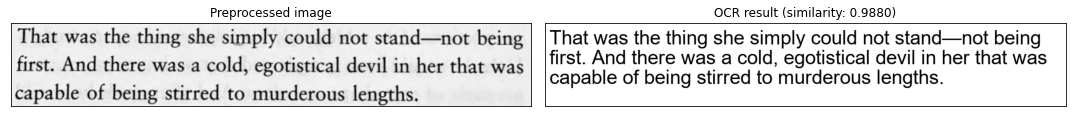

0.012048192771084376

In [3]:
params = hyperopt.pyll.stochastic.sample(search_space)
print(params)
dissimilarity('data/images/4.jpg', 'data/texts/4.txt', params, display=True)

In [4]:
trials = Trials()
best = fmin(
    cummulative_dissimilarity,
    search_space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials,
)

data\images\1.jpg                                     
data\images\1.jpg                                     
1.jpg                                                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

job exception: unsupported operand type(s) for +: 'WindowsPath' and 'str'



  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]


TypeError: unsupported operand type(s) for +: 'WindowsPath' and 'str'

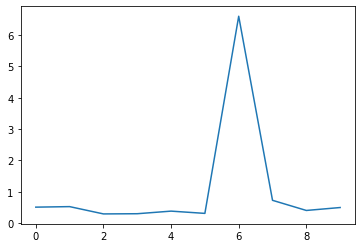

In [ ]:
import matplotlib.pyplot as plt
plt.plot(trials.losses())

In [ ]:
import hyperopt.pyll.stochastic
print(hyperopt.pyll.stochastic.sample(search_space))

{'binarize': (False,), 'denoise': (True, (3, 19, 11)), 'resize': 152}


In [ ]:
space_eval(search_space, best)

{'binarize': (True, (1, 25, 8), {'dilate': (False,), 'erode': (False,)}),
 'denoise': (False,),
 'resize': 151}

{'binarize': (True, (1, 25, 8), {'dilate': (False,), 'erode': (False,)}), 'denoise': (False,), 'resize': 151}


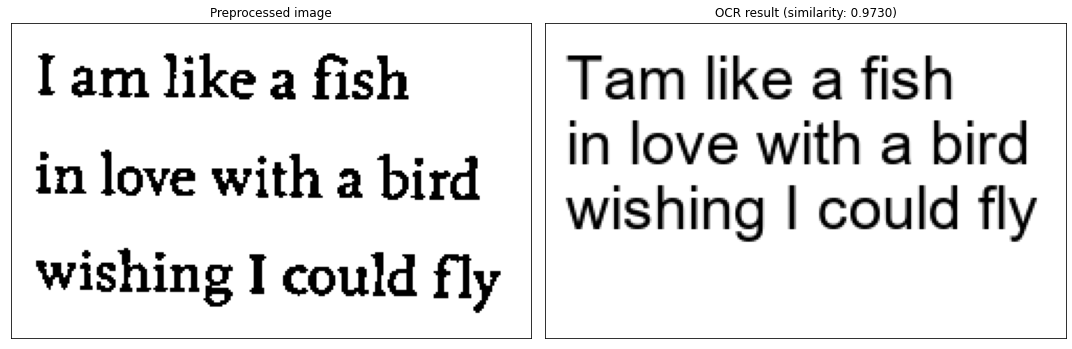

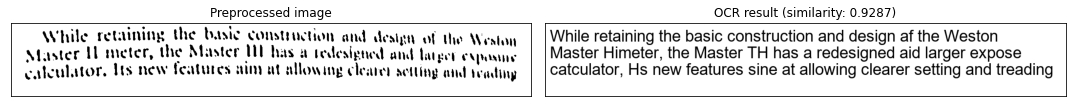

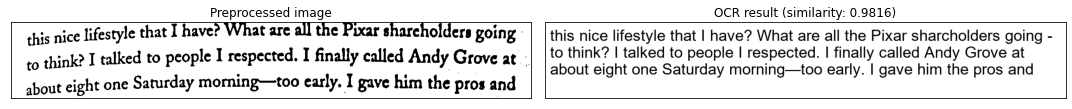

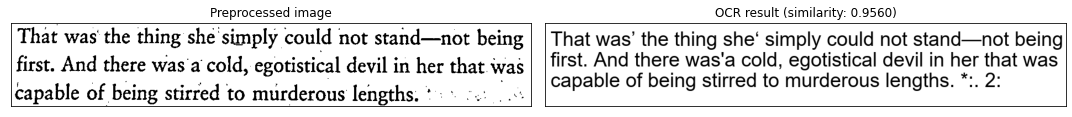

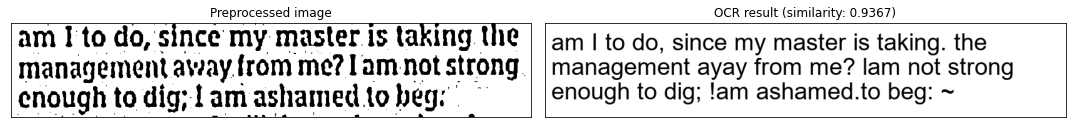

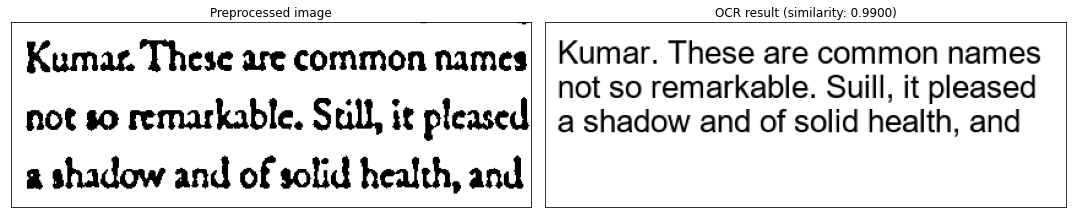

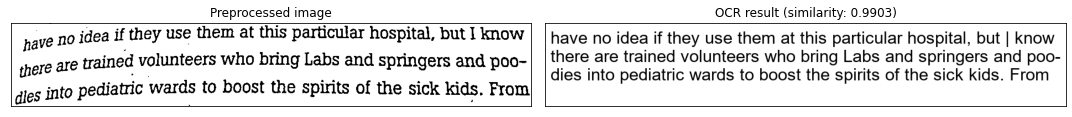

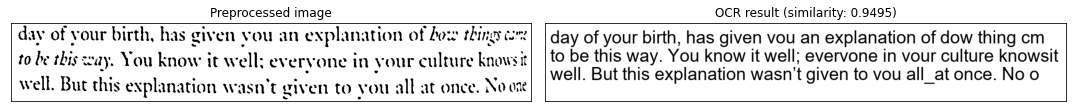

{'loss': 0.2942064754079564,
 'status': 'ok',
 'params': {'binarize': (True,
   (1, 25, 8),
   {'dilate': (False,), 'erode': (False,)}),
  'denoise': (False,),
  'resize': 151}}

In [ ]:
cummulative_dissimilarity(space_eval(search_space, best), display=True)